### MSc Data Analytics Dissertation - Code file
### Submitted by : 230252424 - Sujin Sundar Jegadheesan Kannan
### Supervisor : Dr. Shengwen Wang

### Importing our necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge



from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.pipeline import Pipeline
import ipywidgets as widgets
from IPython.display import display

In [2]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer



### Data collection

### Loading csv files which contain data into dataframes

In [3]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

### Dataframe descriptions and informations

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
matches.describe

<bound method NDFrame.describe of            id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

     

In [6]:
matches.head(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,NaN,Aleem Dar,AM Saheba


In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [8]:
deliveries.describe

<bound method NDFrame.describe of         match_id  inning           batting_team                 bowling_team  \
0         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
1         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
2         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
3         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
4         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
...          ...     ...                    ...                          ...   
260915   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260916   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260917   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260918   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260919   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   

     

In [9]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
5,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
6,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,7,BB McCullum,P Kumar,SC Ganguly,0,1,1,legbyes,0,NaN,NaN,NaN
7,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,BB McCullum,Z Khan,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
8,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
9,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN


### Data cleaning and preprocessing

In [10]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

We need not bother about these null values as,
1. We have the stadium details in venue hence null columns in city doesnt matter.
2. 5 winners are null due to no result matches because of bad weather.
3. 19 result margins are null because the matches resulted in a tie similarly for targetruns and target overs
4. Method column has lot of null values because it has value only if the match has been completed to D/L method.

In [11]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

Similar to matches dataframe we need not bother about these null values as,
1. extras type will have value only if the delivery is a no-ball or wide or legbyes or byes.
2. player dismissed and dismissal kind will have value only if a wicket falls.
3. fielder field is populated only if there is a catch.


In [12]:
### Team name changes
# Five teams need change of names because they have changed it over the years

team_replacements = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Kings XI Punjab': 'Punjab Kings',
    'Deccan Chargers': 'Sunrisers Hyderabad'
}

# Creating a function to rename teams

def replace_team_names(column):
    for old_name, new_name in team_replacements.items():
        column = column.str.replace(old_name, new_name)
    return column

# Function application only on columns where there are team names.
# Doing the changes for both deliveries and matches dataframes.

matches['team1'] = replace_team_names(matches['team1'])
matches['team2'] = replace_team_names(matches['team2'])
matches['toss_winner'] = replace_team_names(matches['toss_winner'])
matches['winner'] = replace_team_names(matches['winner'])

matches["team1"] = matches["team1"].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches["team2"] = matches["team2"].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches["toss_winner"] = matches["toss_winner"].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches["winner"] = matches["winner"].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')


deliveries['batting_team'] = replace_team_names(deliveries['batting_team'])
deliveries['bowling_team'] = replace_team_names(deliveries['bowling_team'])


deliveries["batting_team"] = deliveries["batting_team"].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
deliveries["bowling_team"] = deliveries["bowling_team"].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')


### Season field standardisation

# Creating a function to standardise season/year.

def extract_start_year(season):
    if '/' in season:
        if season == '2020/21':
            start_year = 2020
            return int(start_year)
        else:
            start_year = '20' + season.split('/')[1]
            return int(start_year)
    else:
        return int(season)

# Using the function on the season field of matches dataframe

matches['season'] = matches['season'].apply(extract_start_year)

### Inner joining both dataframes using match_id column
# Ultimate aim is to sort the data season wise historical performnce for each team

merged_data = deliveries.merge(matches, left_on='match_id', right_on='id')

# To gather all the players who have ever appeared on the ground to represent a franchise we deep dive to take the player names from relevant columns from our combined dataframe.
# Grouping our dataframe by season, team, and player for batting, non-striking, bowling, and fielding data

batting_players_1 = merged_data.groupby(['season', 'batting_team', 'batter']).size().reset_index(name='count')
batting_players_2 = merged_data.groupby(['season', 'batting_team', 'non_striker']).size().reset_index(name='count')
bowling_players = merged_data.groupby(['season', 'bowling_team', 'bowler']).size().reset_index(name='count')
fielding_players = merged_data[merged_data['fielder'] != 'N/A'].groupby(['season', 'bowling_team', 'fielder']).size().reset_index(name='count')

# Renaming the obtained columns to remove confusion

batting_players_1.rename(columns={'batting_team': 'team', 'batter': 'player'}, inplace=True)
batting_players_2.rename(columns={'batting_team': 'team', 'non_striker': 'player'}, inplace=True)
bowling_players.rename(columns={'bowling_team': 'team', 'bowler': 'player'}, inplace=True)
fielding_players.rename(columns={'bowling_team': 'team', 'fielder': 'player'}, inplace=True)

# Gathering all the players from our filtered columns

combined_players = pd.concat([batting_players_1, batting_players_2, bowling_players, fielding_players])

# Dropping duplicates as same player might be in all the columns

combined_players = combined_players.drop_duplicates(subset=['season', 'team', 'player'])

# Sorting data by team and season to understand it better

combined_players = combined_players.sort_values(by=['season', 'team'])

# Selecting required columns and saving it into a csv. We can also proceed without saving it into a csv file.

final_player_team_data = combined_players[['season', 'player', 'team']]
final_player_team_data.to_csv('player_team_per_season.csv', index=False)




In [13]:
### Venue name changes
# Venue names are not standardised. Hence processing them for standardisation.
# From 2008 to 2024 lot of stadiums have been renamed.
# Obtaining all the venues from matches['venue'] field and standardising them.


venue_replacements = {
    'M Chinnaswamy Stadium': 'M Chinnaswamy Stadium, Bengaluru',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium, Bengaluru',
    'Feroz Shah Kotla': 'Arun Jaitley Stadium, Delhi',
    'Arun Jaitley Stadium': 'Arun Jaitley Stadium, Delhi',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
    'Rajiv Gandhi International Stadium': 'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
    'Wankhede Stadium': 'Wankhede Stadium, Mumbai',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium, Mumbai',
    'Eden Gardens': 'Eden Gardens, Kolkata',
    'Eden Gardens, Kolkata': 'Eden Gardens, Kolkata',
    'MA Chidambaram Stadium': 'MA Chidambaram Stadium, Chepauk, Chennai',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium, Chepauk, Chennai',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium, Chepauk, Chennai',
    'Narendra Modi Stadium, Ahmedabad': 'Narendra Modi Stadium, Ahmedabad',
    'Dr DY Patil Sports Academy': 'Dr DY Patil Sports Academy, Mumbai',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy, Mumbai',
    'Maharashtra Cricket Association Stadium': 'Maharashtra Cricket Association Stadium, Pune',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium, Pune',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
    'Barsapara Cricket Stadium, Guwahati': 'Barsapara Cricket Stadium, Guwahati',
    'Sawai Mansingh Stadium': 'Sawai Mansingh Stadium, Jaipur',
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium, Jaipur',
    'Himachal Pradesh Cricket Association Stadium': 'Himachal Pradesh Cricket Association Stadium, Dharamsala',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium, Dharamsala',
    'Zayed Cricket Stadium, Abu Dhabi': 'Sheikh Zayed Stadium, Abu Dhabi',
    'Sheikh Zayed Stadium': 'Sheikh Zayed Stadium, Abu Dhabi',
    'Shaheed Veer Narayan Singh International Stadium': 'Shaheed Veer Narayan Singh International Stadium, Raipur',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
    'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur': 'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur',
    'OUTsurance Oval': 'OUTsurance Oval, Bloemfontein',
    'SuperSport Park': 'SuperSport Park, Centurion',
    'Newlands': 'Newlands, Cape Town',
    'St George\'s Park': 'St George\'s Park, Port Elizabeth',
    'Kingsmead': 'Kingsmead, Durban',
    'New Wanderers Stadium': 'New Wanderers Stadium, Johannesburg',
    'Buffalo Park': 'Buffalo Park, East London',
    'De Beers Diamond Oval': 'De Beers Diamond Oval, Kimberley',
    'Brabourne Stadium': 'Brabourne Stadium, Mumbai',
    'Brabourne Stadium, Mumbai': 'Brabourne Stadium, Mumbai',
    'Sardar Patel Stadium, Motera': 'Sardar Patel Stadium, Motera, Ahmedabad',
    'Vidarbha Cricket Association Stadium, Jamtha': 'Vidarbha Cricket Association Stadium, Jamtha, Nagpur',
    'Green Park': 'Green Park, Kanpur',
    'Subrata Roy Sahara Stadium': 'Subrata Roy Sahara Stadium, Pune',
    'JSCA International Stadium Complex': 'JSCA International Stadium Complex, Ranchi',
    'Sharjah Cricket Stadium': 'Sharjah Cricket Stadium, Sharjah',
    'Dubai International Cricket Stadium': 'Dubai International Cricket Stadium, Dubai',
    'Holkar Cricket Stadium': 'Holkar Cricket Stadium, Indore',
    'Barabati Stadium': 'Barabati Stadium, Cuttack',
    'Nehru Stadium': 'Nehru Stadium, Kochi'
}

# Creating a function to rename the venue with their corresponding standard name.

def replace_venue_names(venue_column):
    return venue_column.replace(venue_replacements)

# Function to be applied on relevant column which is venue field.

matches['venue'] = replace_venue_names(matches['venue'])



In [14]:
# Converting season column into integer type for further operations.

matches['season'] = matches['season'].astype(int)
merged_data['season'] = merged_data['season'].astype(int)


### Teamwise stats over the years

In [15]:
### Operations to extract teamwise stats over the history

# Calculating the following stats team wise
# Runs
# Wickets
# Boundaries
# Average innings scores
# Extras

# 1.Runs
teamwise_runs = merged_data.groupby(['season', 'batting_team'])['total_runs'].sum().reset_index()
teamwise_runs.rename(columns={'total_runs': 'runs'}, inplace=True)


# 2.Innings-wise scores

first_innings_scores = merged_data[merged_data['inning'] == 1].groupby(['match_id', 'season', 'batting_team'])['total_runs'].sum().reset_index()
second_innings_scores = merged_data[merged_data['inning'] == 2].groupby(['match_id', 'season', 'batting_team'])['total_runs'].sum().reset_index()

# Renaming for better understanding

first_innings_scores.rename(columns={'total_runs': 'first_innings_score'}, inplace=True)
second_innings_scores.rename(columns={'total_runs': 'second_innings_score'}, inplace=True)

# Calculating average scores per team per season

agg_first_innings = first_innings_scores.groupby(['season', 'batting_team']).agg(
    total_first_innings_score=('first_innings_score', 'sum'),
    avg_first_innings_score=('first_innings_score', 'mean'),
    matches_played_first_innings=('match_id', 'nunique')
).reset_index()

agg_second_innings = second_innings_scores.groupby(['season', 'batting_team']).agg(
    total_second_innings_score=('second_innings_score', 'sum'),
    avg_second_innings_score=('second_innings_score', 'mean'),
    matches_played_second_innings=('match_id', 'nunique')
).reset_index()

# Merging the obtained dataframes into a single DataFrame and obtaining required data team wise and season wise

teamwise_scores = pd.merge(agg_first_innings, agg_second_innings, on=['season', 'batting_team'], how='outer')
teamwise_scores['total_matches_played'] = teamwise_scores['matches_played_first_innings'] + teamwise_scores['matches_played_second_innings']
teamwise_scores.rename(columns={'batting_team': 'team'}, inplace=True)

# Columns which have our required data

teamwise_scores = teamwise_scores[['season', 'team', 'total_first_innings_score', 'avg_first_innings_score',
                                   'total_second_innings_score', 'avg_second_innings_score', 'total_matches_played']]

# 3.Boundaries per team

boundaries = merged_data[(merged_data['batsman_runs'] == 4) | (merged_data['batsman_runs'] == 6)]

# Calculating 4s and 6s every year per team

teamwise_boundaries = boundaries.groupby(['season', 'batting_team', 'batsman_runs']).size().unstack(fill_value=0).reset_index()
teamwise_boundaries.rename(columns={4: 'fours', 6: 'sixes'}, inplace=True)

# 4.Wickets

wickets = merged_data[merged_data['is_wicket'] == 1]

# Calculate wickets every year per team

teamwise_wickets = wickets.groupby(['season', 'bowling_team'])['is_wicket'].sum().reset_index()
teamwise_wickets.rename(columns={'is_wicket': 'wickets'}, inplace=True)

# 5. Extras just like wickets

team_extras_yearly = merged_data.groupby(['season', 'bowling_team'])['extra_runs'].sum().reset_index()

### Team wise retentions and new players over the years

In [16]:
# Filtering data from 2008 to 2024.
# Filtering can be adjusted to check teams auction history for particular years alone

filtered_player_data = final_player_team_data[final_player_team_data['season'].between(2008, 2024)]
filtered_matches = matches[matches['season'].between(2008, 2024)]

# Initializing dictionary to withhold the player history

team_year_data = {}

# Calculating the following team wise per season
#  new players,
#  retained players and 
#  wins

# Calculating new and retained players

for year in range(2008, 2025):
    year_data = filtered_player_data[filtered_player_data['season'] == year]
    for team in year_data['team'].unique():
        if team not in team_year_data:
            team_year_data[team] = {}
        players = set(year_data[year_data['team'] == team]['player'])
        if year == 2008:
            team_year_data[team][year] = {
                'new_players': len(players),
                'retained_players': 0,
                'total_players': len(players)
            }
        else:
            prev_players = set(filtered_player_data[(filtered_player_data['season'] == year - 1) & 
                                                    (filtered_player_data['team'] == team)]['player'])
            retained_players = len(players & prev_players)
            new_players = len(players - prev_players)
            team_year_data[team][year] = {
                'new_players': new_players,
                'retained_players': retained_players,
                'total_players': len(players)
            }

# Calculating wins

for team in team_year_data.keys():
    for year in team_year_data[team].keys():
        wins = len(filtered_matches[(filtered_matches['season'] == year) & (filtered_matches['winner'] == team)])
        team_year_data[team][year]['wins'] = wins

# Converting our processed dictionary into a dataframe

team_year_df = []
for team, years in team_year_data.items():
    for year, data in years.items():
        team_year_df.append([team, year, data['new_players'], data['retained_players'], data['wins']])
team_year_df = pd.DataFrame(team_year_df, columns=['team', 'year', 'new_players', 'retained_players', 'wins'])

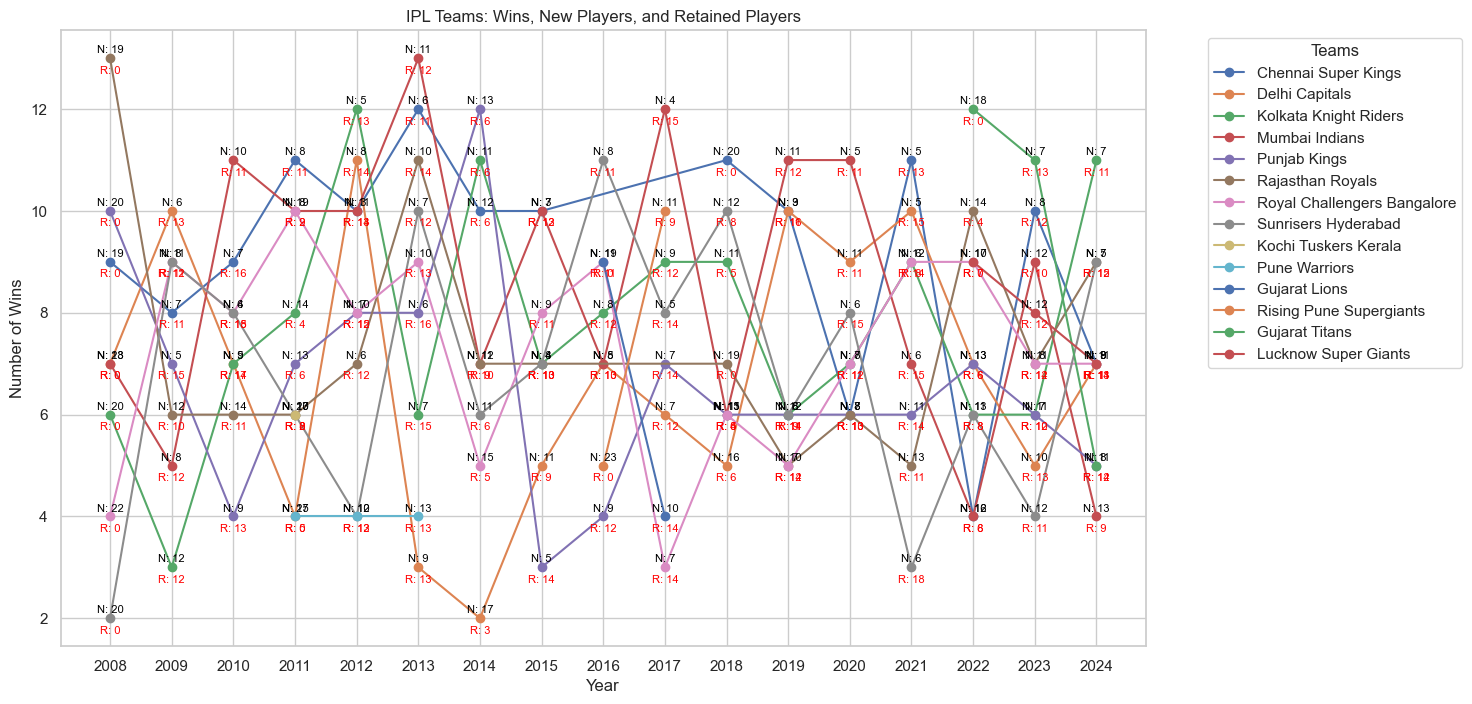

In [17]:
# Visualzing our results
# Set the plot style

sns.set(style="whitegrid")

# Get unique teams

teams = team_year_df['team'].unique()

# Create line plots for each team

plt.figure(figsize=(14, 8))
for team in teams:
    team_data = team_year_df[team_year_df['team'] == team]
    plt.plot(team_data['year'], team_data['wins'], marker='o', label=team)

    for i, row in team_data.iterrows():
        plt.text(row['year'], row['wins'] + 0.1, f'N: {row["new_players"]}', color='black', ha='center', fontsize=8)
        plt.text(row['year'], row['wins'] - 0.3, f'R: {row["retained_players"]}', color='red', ha='center', fontsize=8)

# Add legend

plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('IPL Teams: Wins, New Players, and Retained Players')
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(2008, 2025))
plt.show()

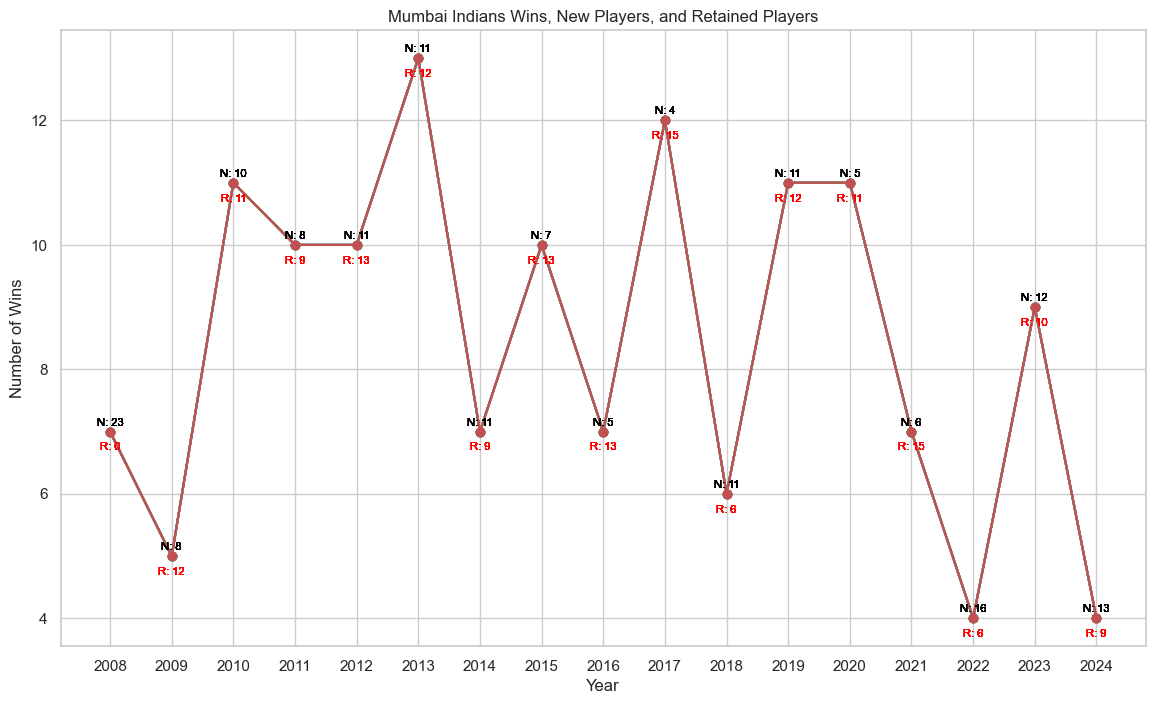

In [18]:
# Visualization for a individual team alone in case

sns.set(style="whitegrid")
teams = team_year_df['team'].unique()
plt.figure(figsize=(14, 8))
for team in teams:
    
    # Team name can be changed

    team_data = team_year_df[team_year_df['team'] == 'Mumbai Indians']
    plt.plot(team_data['year'], team_data['wins'], marker='o', label=team)

    for i, row in team_data.iterrows():
        plt.text(row['year'], row['wins'] + 0.1, f'N: {row["new_players"]}', color='black', ha='center', fontsize=8)
        plt.text(row['year'], row['wins'] - 0.3, f'R: {row["retained_players"]}', color='red', ha='center', fontsize=8)
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Mumbai Indians Wins, New Players, and Retained Players')
plt.xticks(range(2008, 2025))
plt.show()

In [19]:
### Saving our data and modifying the season column

final_player_team_data = pd.read_csv('player_team_per_season.csv')
final_player_team_data['season'] = final_player_team_data['season'].astype(int)

In [20]:
team_year_df.rename(columns={'year': 'season'}, inplace=True)

### Team wise home and away performances

In [21]:
# League matches filtering

league_matches = matches[matches['match_type'] == 'League']

# DataFrame to hold the data

results = []

# Looping through season wise per team

for season in league_matches['season'].unique():
    
    season_matches = league_matches[league_matches['season'] == season]
    
    # Teams played in this current season

    teams = pd.concat([season_matches['team1'], season_matches['team2']]).unique()
    
    for team in teams:

        # Calculating total matches

        total_matches = season_matches[(season_matches['team1'] == team) | (season_matches['team2'] == team)].shape[0]
        
        # Calculating total wins

        total_wins = season_matches[(season_matches['winner'] == team)].shape[0]
        
        # Calculating home wins

        home_wins = season_matches[(season_matches['winner'] == team) & (season_matches['team1'] == team)].shape[0]
        
        # Calculating away wins

        away_wins = season_matches[(season_matches['winner'] == team) & (season_matches['team2'] == team)].shape[0]
        
        # Calculating no result matches

        no_result_matches = season_matches[season_matches['winner'].isna() & ((season_matches['team1'] == team) | (season_matches['team2'] == team))].shape[0]

        # Calculating total losses (exclude no result matches)

        total_losses = total_matches - total_wins - no_result_matches
        
        # Calculating home losses

        home_losses = season_matches[(season_matches['team1'] == team) & (season_matches['winner'] == season_matches['team2'])].shape[0]
        
        # Calculating away losses

        away_losses = season_matches[(season_matches['team2'] == team) & (season_matches['winner'] == season_matches['team1'])].shape[0]
        
        # Storing the data into our dataframe created

        results.append({
            'Season': season,
            'Team': team,
            'Total matches played': total_matches,
            'Totalseason wins': total_wins,
            'home_wins': home_wins,
            'away_wins': away_wins,
            'Total losses': total_losses,
            'home_losses': home_losses,
            'away_losses': away_losses,
            'No result matches': no_result_matches  # Count of no result matches
        })

league_results_df = pd.DataFrame(results)


In [22]:
# Renaming columns

team_year_df.rename(columns={'year': 'season'}, inplace=True)
teamwise_wickets.rename(columns={'bowling_team': 'team'}, inplace=True)
teamwise_boundaries.rename(columns={'batting_team': 'team'}, inplace=True)
team_extras_yearly.rename(columns={'bowling_team': 'team'}, inplace=True)

# Ensuring column `total_matches_played` is in teamwise_scores
teamwise_scores = teamwise_scores[['season', 'team', 'total_first_innings_score', 'avg_first_innings_score',
                                   'total_second_innings_score', 'avg_second_innings_score', 'total_matches_played']]


### Head to head history of teams

In [23]:
teams = set(matches['team1']).union(set(matches['team2']))

# Initializing dictionary to store result

head_to_head = {team: {opponent: 0 for opponent in teams if opponent != team} for team in teams}

# Updating based on match results, excluding "no result" and NaN matches

for index, row in matches.iterrows():
    if pd.notna(row['winner']) and row['winner'] != 'NA':
        winner = row['winner']
        loser = row['team1'] if row['team2'] == winner else row['team2']
        head_to_head[winner][loser] += 1

# head_to_head        


### Venue wise history - tosses, scores

In [24]:
venue_toss_decisions = matches.groupby(['venue', 'toss_decision']).size().unstack(fill_value=0)
venue_toss_decisions.columns = ['bat_first', 'field_first']
venue_toss_decisions.reset_index(inplace=True)
venue_score = deliveries.merge(matches[['id', 'venue']], left_on='match_id', right_on='id', how='left')

# Calculate average first innings score for each venue

first_innings = venue_score[venue_score['inning'] == 1]
first_innings_score = first_innings.groupby(['match_id', 'venue'])['total_runs'].sum().reset_index()
average_score_per_venue = first_innings_score.groupby('venue')['total_runs'].mean().reset_index()
average_score_per_venue.columns = ['Venue', 'Average_First_Innings_Score']

### Player of the match history

In [25]:
potm_season_team = matches[['season', 'winner', 'player_of_match']].copy()

# Gathering data by season, team, and player_of_match to get the POTM count

potm_counts = potm_season_team.groupby(['season', 'winner', 'player_of_match']).size().reset_index(name='count')

# Renaming column for better understanding

potm_counts.rename(columns={'winner': 'team', 'player_of_match': 'player'}, inplace=True)
team_season_potm_counts = potm_counts.groupby(['season', 'team'])['count'].sum().reset_index()

# Rename column for better understanding

team_season_potm_counts.rename(columns={'count': 'total_potm_count'}, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11212\3331232355.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='winner', data=matches, order=matches['winner'].value_counts().index,palette=reversed_palette)


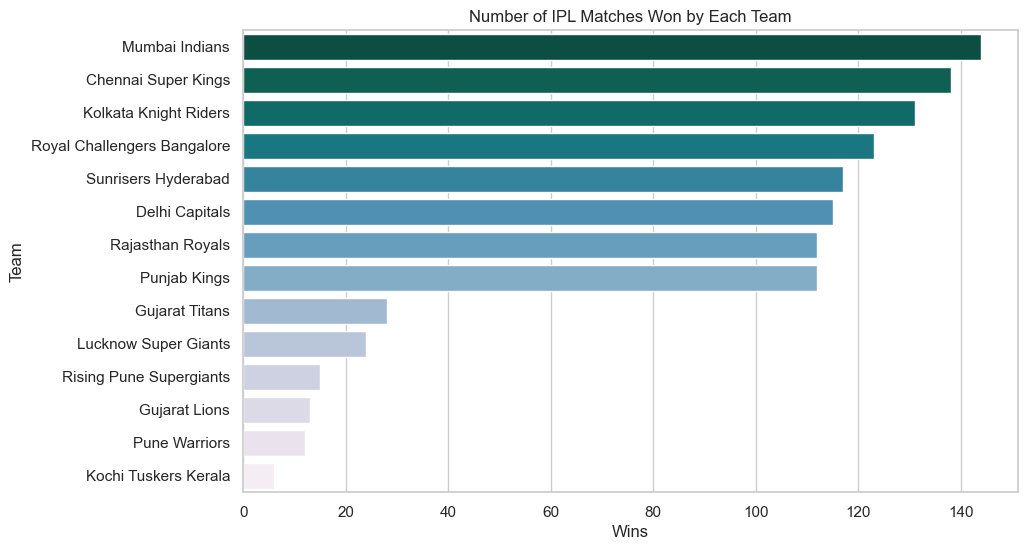

In [26]:
# Visualzing the number of IPL matches won by each team

palette = sns.color_palette("PuBuGn", len(matches['winner'].value_counts()))
reversed_palette = palette[::-1]
plt.figure(figsize=(10, 6))
sns.countplot(y='winner', data=matches, order=matches['winner'].value_counts().index,palette=reversed_palette)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of IPL Matches Won by Each Team')
plt.show()

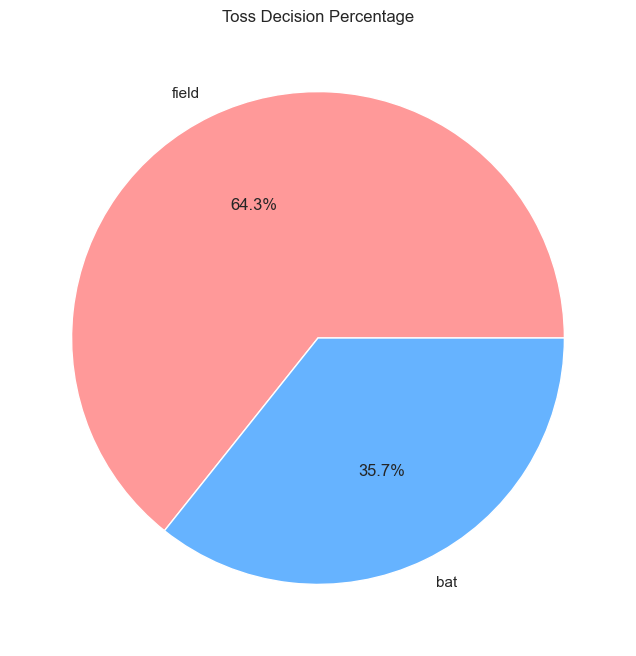

In [27]:
# Pie chart for toss decisions

toss_decision_counts = matches['toss_decision'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(toss_decision_counts, labels=toss_decision_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Toss Decision Percentage')
plt.show()

<Figure size 10000x10000 with 0 Axes>

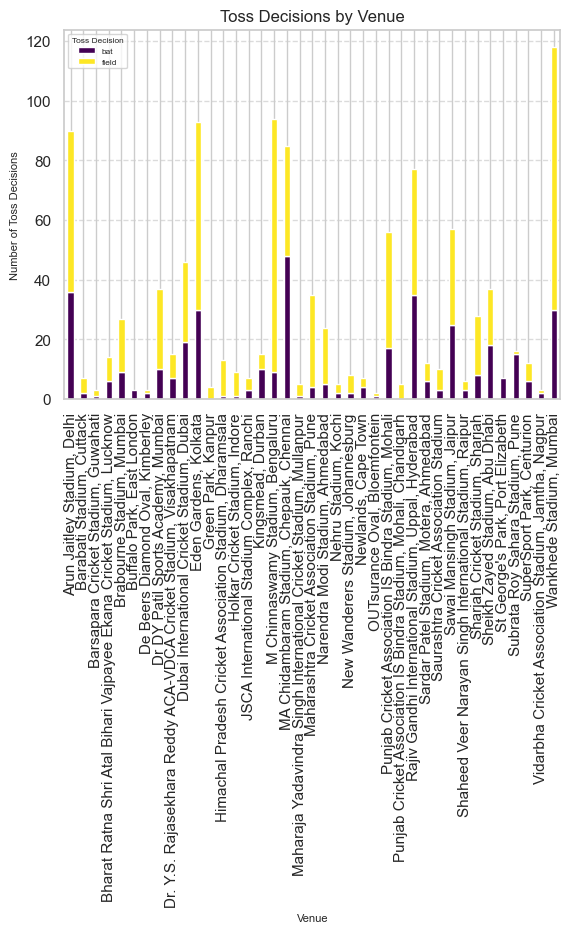

In [28]:
# Venue wise toss decision counts plot

venue_toss_decisions = matches.groupby(['venue', 'toss_decision']).size().unstack(fill_value=0)
plt.figure(figsize=(100, 100))
venue_toss_decisions.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Venue', fontsize=8)
plt.ylabel('Number of Toss Decisions', fontsize=8)
plt.title('Toss Decisions by Venue', fontsize=12)
plt.legend(title='Toss Decision', title_fontsize='6', fontsize='6')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

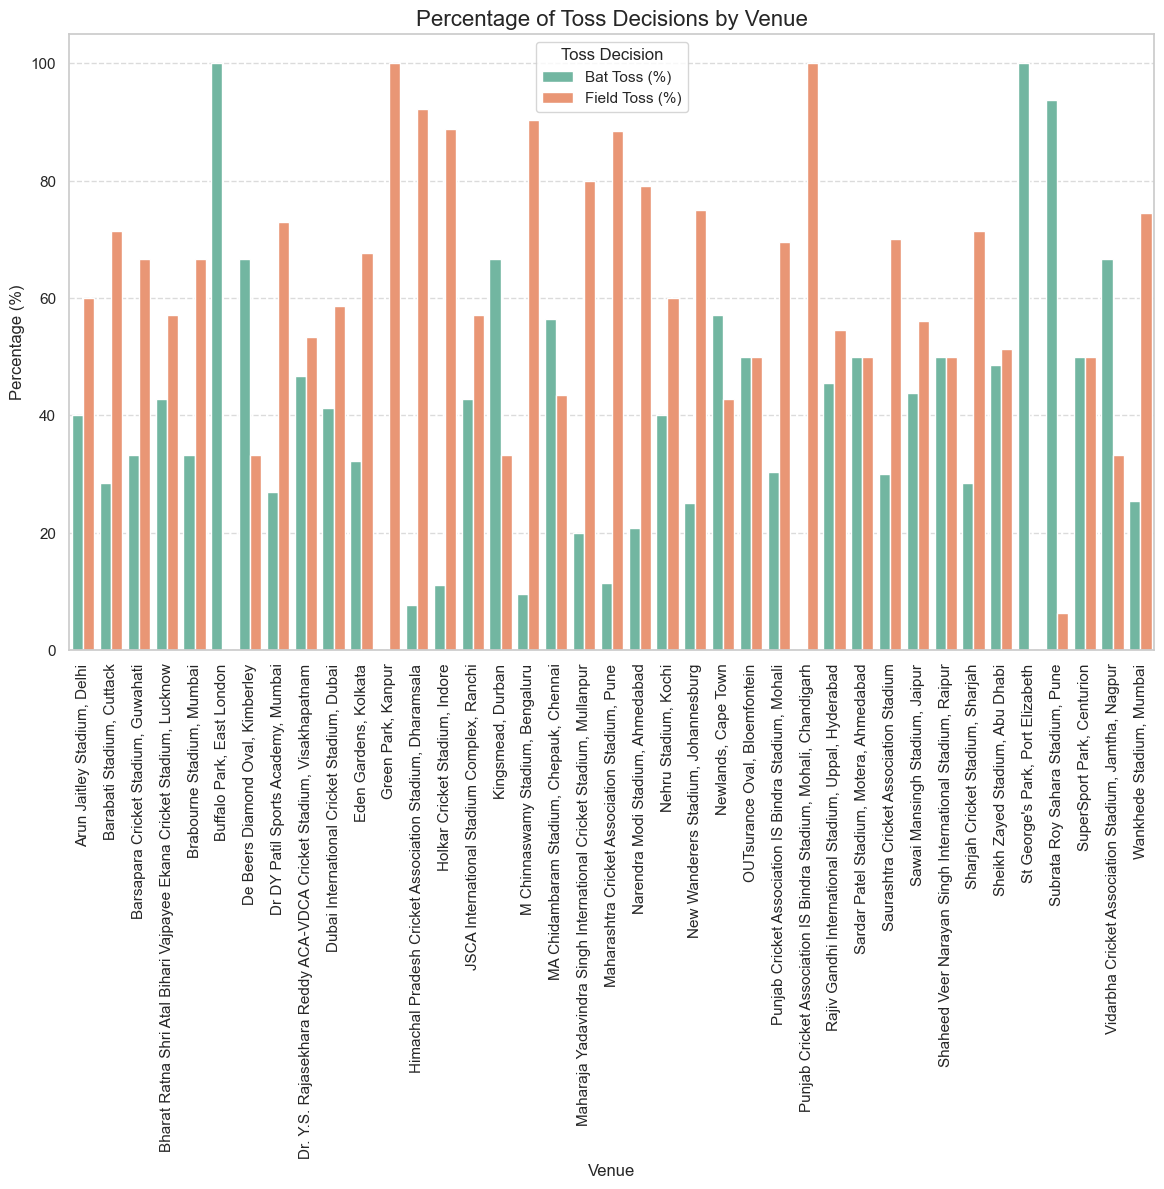

In [29]:
# Venue wise toss decision counts plot

venue_toss_decisions = matches.groupby(['venue', 'toss_decision']).size().unstack(fill_value=0)
venue_toss_decisions['Total Tosses'] = venue_toss_decisions.sum(axis=1)

# Calculating toss decision percentages

venue_toss_decisions['Bat Toss (%)'] = (venue_toss_decisions['bat'] / venue_toss_decisions['Total Tosses']) * 100
venue_toss_decisions['Field Toss (%)'] = (venue_toss_decisions['field'] / venue_toss_decisions['Total Tosses']) * 100
percentage_data = venue_toss_decisions[['Bat Toss (%)', 'Field Toss (%)']]
percentage_data.reset_index(inplace=True)

# Melting into long format to support seaborn

melted_data = percentage_data.melt(id_vars='venue', var_name='Toss Decision', value_name='Percentage')

# Plotting

plt.figure(figsize=(14, 8))
sns.barplot(x='venue', y='Percentage', hue='Toss Decision', data=melted_data, palette='Set2')
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Percentage of Toss Decisions by Venue', fontsize=16)
plt.legend(title='Toss Decision')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11212\356339946.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Venue',y='Average_First_Innings_Score',  data=average_score_per_venue, palette='viridis')


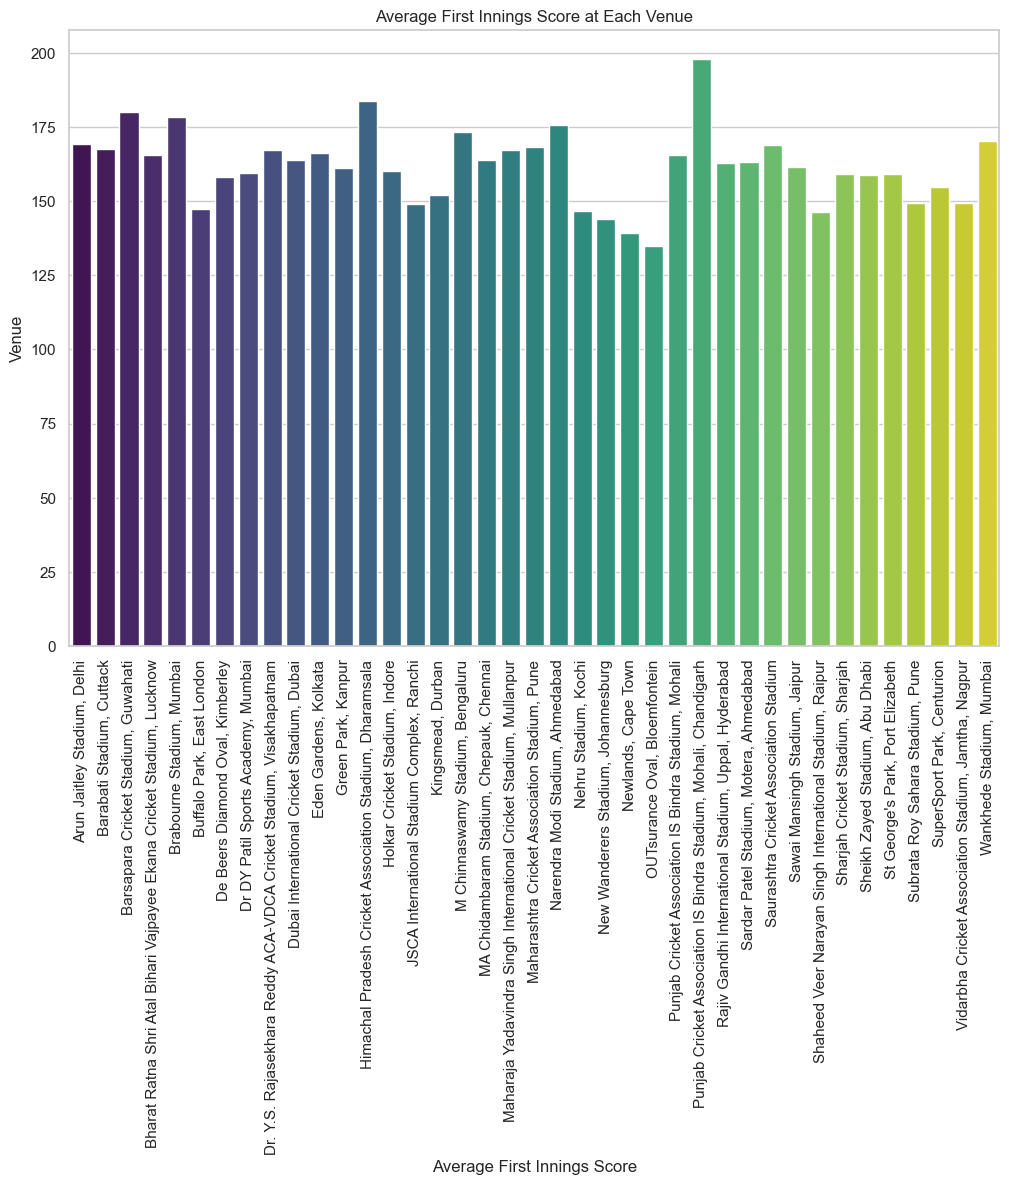

In [30]:
# Plotting average First Innings Score at Each Venue

merged_data = deliveries.merge(matches[['id', 'venue']], left_on='match_id', right_on='id', how='left')

# Filtering out first innings data only, summing up the runs and averaging it venue wise

first_innings = merged_data[merged_data['inning'] == 1]
first_innings_score = first_innings.groupby(['match_id', 'venue'])['total_runs'].sum().reset_index()
average_score_per_venue = first_innings_score.groupby('venue')['total_runs'].mean().reset_index()
average_score_per_venue.columns = ['Venue', 'Average_First_Innings_Score']

# Plotting

plt.figure(figsize=(12, 8))
sns.barplot(x='Venue',y='Average_First_Innings_Score',  data=average_score_per_venue, palette='viridis')
plt.title('Average First Innings Score at Each Venue')
plt.xlabel('Average First Innings Score')
plt.ylabel('Venue')
plt.xticks(rotation = 90)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11212\972354409.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Count', data=winners_more_than_5, palette='viridis')


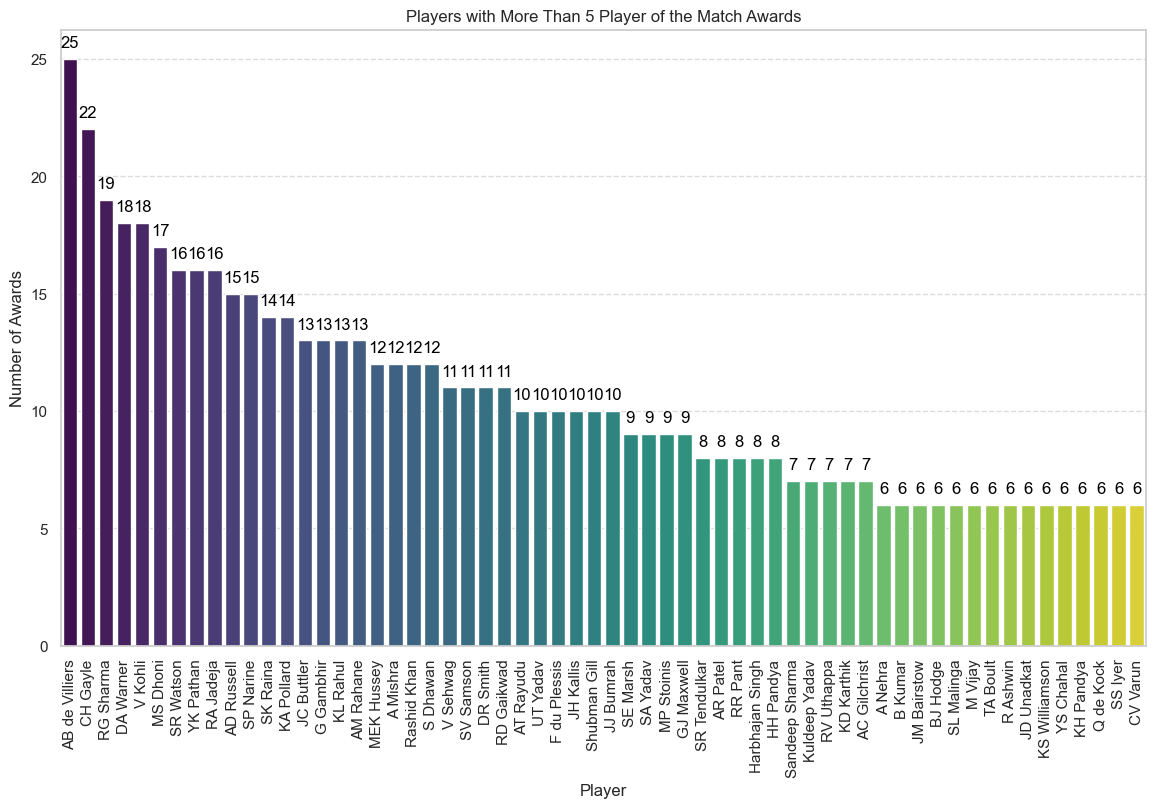

In [31]:
# Visualizing counts of Player of the Match awards

player_of_match_counts = matches['player_of_match'].value_counts().reset_index()
player_of_match_counts.columns = ['Player', 'Count']

# Displaying only players who have won more than 5 times for clarity of the graph

winners_more_than_5 = player_of_match_counts[player_of_match_counts['Count'] > 5]
winners_5_or_less = player_of_match_counts[player_of_match_counts['Count'] <= 5]

# Plotting
plt.figure(figsize=(14, 8))
if not winners_more_than_5.empty:
    sns.barplot(x='Player', y='Count', data=winners_more_than_5, palette='viridis')
    plt.title('Players with More Than 5 Player of the Match Awards')
    plt.xlabel('Player')
    plt.ylabel('Number of Awards')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for index, row in winners_more_than_5.iterrows():
        plt.text(index, row['Count'] + 0.5, row['Count'], color='black', ha='center')

    plt.show()


### Data preprocessing and visualizations done and now getting our final dataframe for predictions

In [32]:
# Merging team_year_df with teamwise_wickets, teamwise_boundaries, team_extras_yearly, teamwise_scores

merged_df = pd.merge(team_year_df, teamwise_wickets, on=['season', 'team'], how='left')
merged_df = pd.merge(merged_df, teamwise_boundaries, on=['season', 'team'], how='left')
merged_df = pd.merge(merged_df, team_extras_yearly, on=['season', 'team'], how='left')
merged_df = pd.merge(merged_df, teamwise_scores, on=['season', 'team'], how='left')

In [33]:
# Merging with league history dataframe which has home and away performance

merged_df = pd.merge(merged_df,league_results_df, left_on=['season', 'team'], right_on=['Season', 'Team'], how='left')

In [34]:
# Dropping the duplicate 'Season' and 'Team' columns

merged_df.drop(columns=['Season', 'Team'], inplace=True)

# Renaming columns for better understanding

merged_df.rename(columns={
    'total_matches_played': 'Season matches',  # Rename for clarity
    'Total matches played': 'League matches',  # Clarify the difference
    'wins': 'Total wins',
    'wickets': 'Total wickets',
    'fours': 'Total fours',
    'sixes': 'Total sixes',
    'extra_runs': 'Total extras',
    'avg_first_innings_score': 'Average first innings score',
    'avg_second_innings_score': 'Average second innings score'
}, inplace=True)

merged_df.rename(columns={
    'Totalseason wins': 'League wins'}, inplace = True)

In [35]:
# Teams and their toss winning history

toss_wins = matches['toss_winner'].value_counts()
toss_decision_counts = matches['toss_decision'].value_counts()
toss_results_df = matches[['season', 'id', 'toss_winner', 'venue']].copy()

toss_wins.head()

toss_winner
Mumbai Indians           143
Sunrisers Hyderabad      131
Delhi Capitals           130
Chennai Super Kings      122
Kolkata Knight Riders    122
Name: count, dtype: int64

### Gathering the knockout performances of teams seasonwise

In [36]:
# Defining the knockouts as per the values in the columns

playoff_types = ['Qualifier 1', 'Qualifier 2', 'Eliminator', 'Semi Final', '3rd Place Play-Off']
final_types = ['Final']

# Filtering only knockout matches

playoff_matches = matches[matches['match_type'].isin(playoff_types)]
final_matches = matches[matches['match_type'].isin(final_types)]

# Getting the teams who have qualified for playoffs (Knockouts)

playoff_teams = pd.concat([playoff_matches['team1'], playoff_matches['team2']])
playoff_teams_count = playoff_teams.value_counts().reset_index()
playoff_teams_count.columns = ['team', 'count']

# Getting the teams who have qualified for finals

final_teams = pd.concat([final_matches['team1'], final_matches['team2']])
final_teams_count = final_teams.value_counts().reset_index()
final_teams_count.columns = ['team', 'count']

# Getting the title winners

final_winners_count = final_matches['winner'].value_counts().reset_index()
final_winners_count.columns = ['team', 'count']

### Batting first/second wins per team and also venue wise wins

In [37]:
# Function to find which team has won the match

def get_innings_type(row):
    if (row['winner'] == row['team1'] and row['toss_decision'] == 'bat') or (row['winner'] == row['team2'] and row['toss_decision'] == 'field'):
        return 'bat_first'
    else:
        return 'bat_second'

# Using the function

matches['innings_type'] = matches.apply(get_innings_type, axis=1)

# Teams and their for batting first and second wins

team_wise_wins = matches.groupby(['winner', 'innings_type']).size().unstack(fill_value=0).reset_index()
team_wise_wins.columns = ['team', 'batting_first_wins', 'batting_second_wins']

# Venue wise data for the same

venue_wise_wins = matches.groupby(['venue', 'innings_type']).size().unstack(fill_value=0).reset_index()
venue_wise_wins.columns = ['venue', 'batting_first_wins', 'batting_second_wins']

# Outputs

print("Team-wise Batting First and Second Wins Count:")
print(team_wise_wins)

print("\nVenue-wise Batting First and Second Wins Count:")
print(venue_wise_wins)

Team-wise Batting First and Second Wins Count:
                           team  batting_first_wins  batting_second_wins
0           Chennai Super Kings                  84                   54
1                Delhi Capitals                  60                   55
2                 Gujarat Lions                  10                    3
3                Gujarat Titans                  14                   14
4          Kochi Tuskers Kerala                   3                    3
5         Kolkata Knight Riders                  66                   65
6          Lucknow Super Giants                  10                   14
7                Mumbai Indians                  72                   72
8                 Pune Warriors                   9                    3
9                  Punjab Kings                  54                   58
10             Rajasthan Royals                  60                   52
11      Rising Pune Supergiants                   8                    7
12  

### Adding the knockout performance data into our final data frame

In [38]:
# Initializing the new columns
# All the three columns are boolean

merged_df['knockout_qualified'] = 0
merged_df['finals_qualified'] = 0
merged_df['final_winner'] = 0

# Getting unique seasons 2008 to 2024

unique_seasons = merged_df['season'].unique()


# Team wise knockout performance over the years

for season in unique_seasons:

    # Filtering for teams who achieved playoffs in that season

    playoff_matches_season = playoff_matches[playoff_matches['season'] == season]
    if not playoff_matches_season.empty:
        playoff_teams_season = pd.concat([playoff_matches_season['team1'], playoff_matches_season['team2']]).unique()
        merged_df.loc[(merged_df['season'] == season) & (merged_df['team'].isin(playoff_teams_season)), 'knockout_qualified'] = 1

    # Filtering teams reaching finals

    final_matches_season = final_matches[final_matches['season'] == season]
    if not final_matches_season.empty:
        final_teams_season = pd.concat([final_matches_season['team1'], final_matches_season['team2']]).unique()
        merged_df.loc[(merged_df['season'] == season) & (merged_df['team'].isin(final_teams_season)), 'finals_qualified'] = 1

        # Final winners

        final_winners_season = final_matches_season['winner'].unique()
        merged_df.loc[(merged_df['season'] == season) & (merged_df['team'].isin(final_winners_season)), 'final_winner'] = 1

In [39]:
# Teamwise player of the match history
# Merge the POTM counts with the main merged_df

merged_df = pd.merge(merged_df, team_season_potm_counts, on=['season', 'team'], how='left')

# Fill any missing POTM counts with 0

merged_df['total_potm_count'] = merged_df['total_potm_count'].fillna(0)

### Final dataframe from all our analyses

In [40]:
finalDataFrame = merged_df

### Statistical Analysis

In [41]:
# Calculate mean, median, and mode
mean_values = finalDataFrame[['Total wins', 'Total losses', 'new_players', 'retained_players']].mean()
median_values = finalDataFrame[['Total wins', 'Total losses', 'new_players', 'retained_players']].median()
mode_values = finalDataFrame[['Total wins', 'Total losses', 'new_players', 'retained_players']].mode().iloc[0]


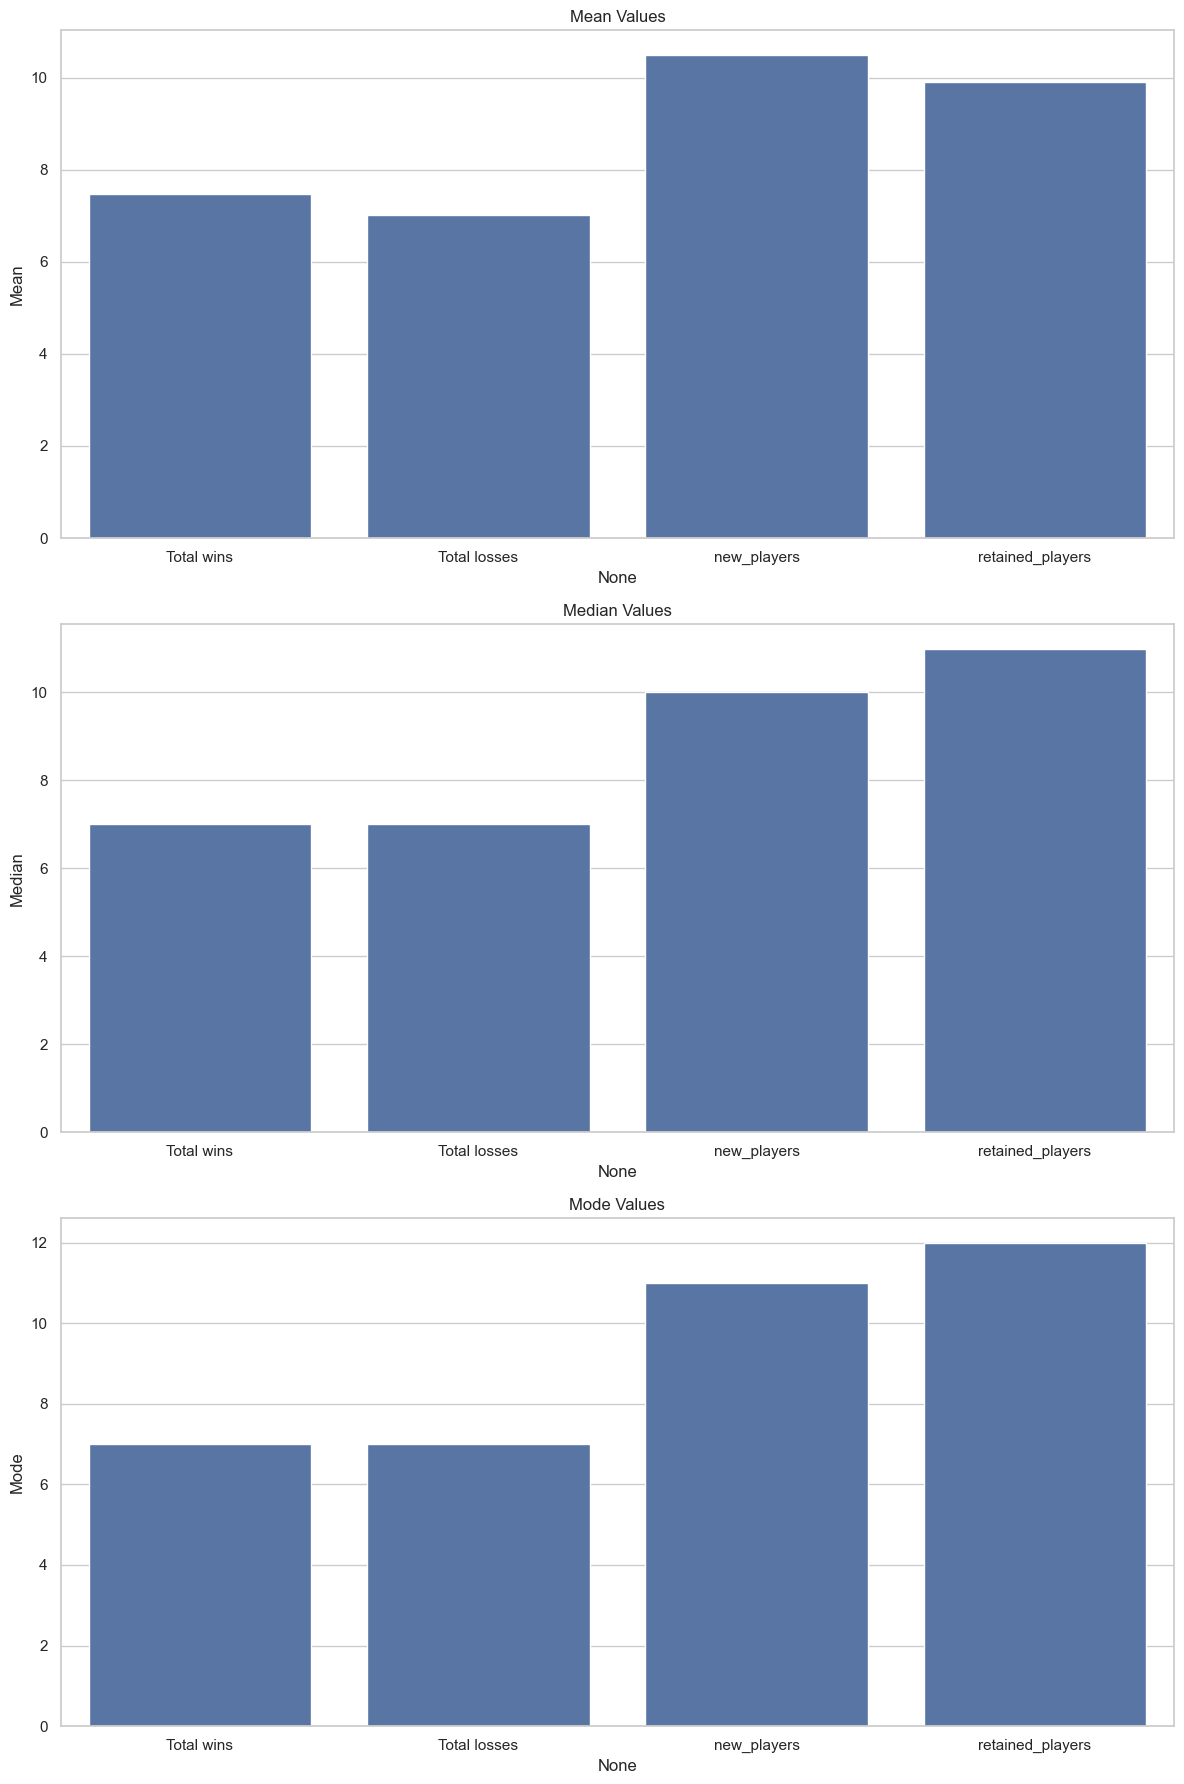

In [42]:
# Plot mean, median, mode
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(x=mean_values.index, y=mean_values.values, ax=axes[0])
axes[0].set_title('Mean Values')
axes[0].set_ylabel('Mean')

sns.barplot(x=median_values.index, y=median_values.values, ax=axes[1])
axes[1].set_title('Median Values')
axes[1].set_ylabel('Median')

sns.barplot(x=mode_values.index, y=mode_values.values, ax=axes[2])
axes[2].set_title('Mode Values')
axes[2].set_ylabel('Mode')

plt.tight_layout()
plt.show()

### Correlation

In [43]:
# Select the features
features = ['team','season',
    'new_players', 'retained_players','Total wins',
    'Total wickets', 'Total fours', 'Total sixes', 'Total extras',
    'total_first_innings_score', 'Average first innings score',
    'total_second_innings_score', 'Average second innings score',
    'Season matches', 'League matches', 'League wins', 'home_wins',
    'away_wins', 'Total losses', 'home_losses', 'away_losses',
    'total_potm_count',
]

# Create the feature DataFrame
correlation = finalDataFrame[features]

# Convert categorical variables (team and season) to dummy variables
correlation = pd.get_dummies(correlation, columns=['team', 'season'], drop_first=True)
# Calculate the correlation matrix
correlation_matrix = correlation.corr()

# Get the correlation of all features with respect to 'Total wins'
correlation_with_target = correlation_matrix['Total wins'].sort_values(ascending=False)

# Display the correlation
print(correlation_with_target)

total_potm_count                    1.000000
Total wins                          1.000000
League wins                         0.968579
Total wickets                       0.803190
Season matches                      0.746049
home_wins                           0.670696
Total fours                         0.645808
away_wins                           0.516791
total_first_innings_score           0.301172
Total sixes                         0.289943
Average first innings score         0.288106
total_second_innings_score          0.283401
Total extras                        0.196785
team_Mumbai Indians                 0.146567
League matches                      0.131369
team_Gujarat Titans                 0.108689
season_2013                         0.100791
Average second innings score        0.090204
season_2012                         0.077905
team_Kolkata Knight Riders          0.035026
team_Lucknow Super Giants           0.031092
retained_players                    0.025787
season_201

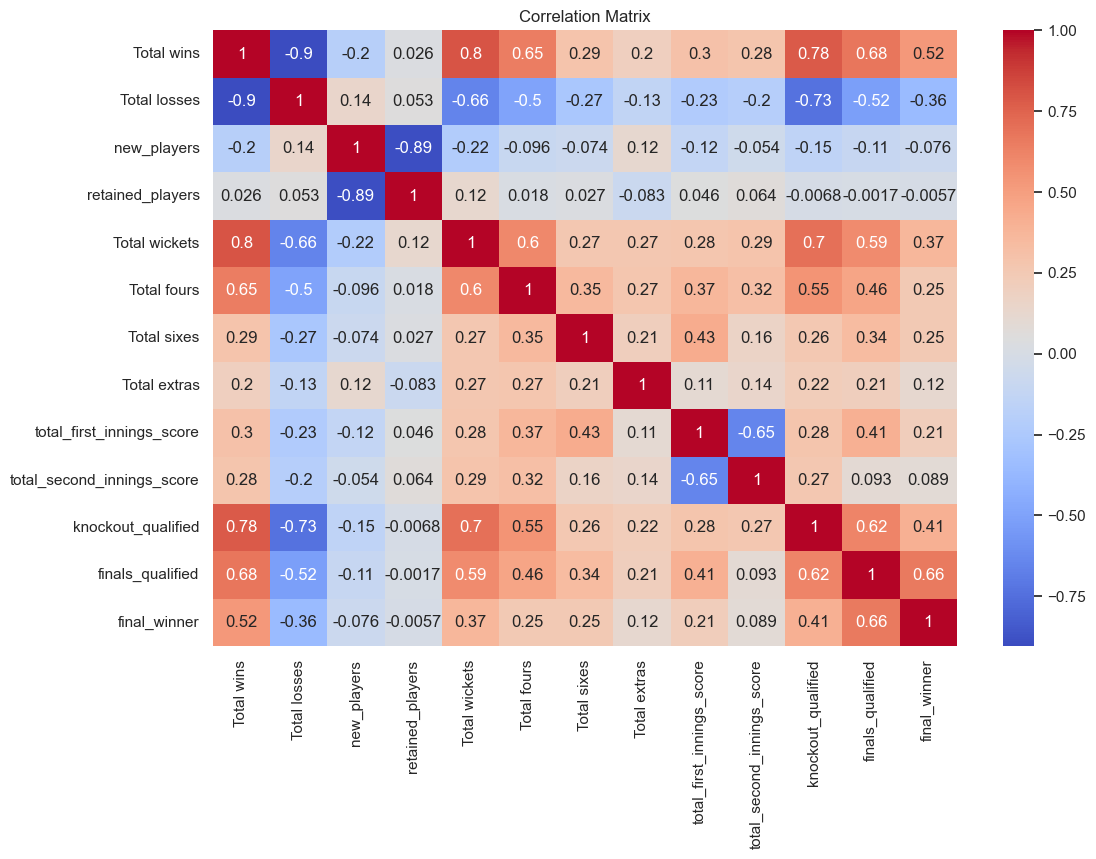

In [44]:
correlation_matrix = finalDataFrame[['Total wins', 'Total losses', 'new_players', 'retained_players', 'Total wickets', 'Total fours', 'Total sixes', 'Total extras', 'total_first_innings_score', 'total_second_innings_score', 'knockout_qualified', 'finals_qualified', 'final_winner']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

                              Total wins Correlation  League wins Correlation
season                                     -0.028493                -0.037612
new_players                                -0.197346                -0.183965
retained_players                            0.025787                 0.018202
Total wickets                               0.803190                 0.763217
Total fours                                 0.645808                 0.614261
Total sixes                                 0.289943                 0.231308
Total extras                                0.196785                 0.158894
total_first_innings_score                   0.301172                 0.263397
Average first innings score                 0.288106                 0.262431
total_second_innings_score                  0.283401                 0.266099
Average second innings score                0.090204                 0.071640
Season matches                              0.746049            

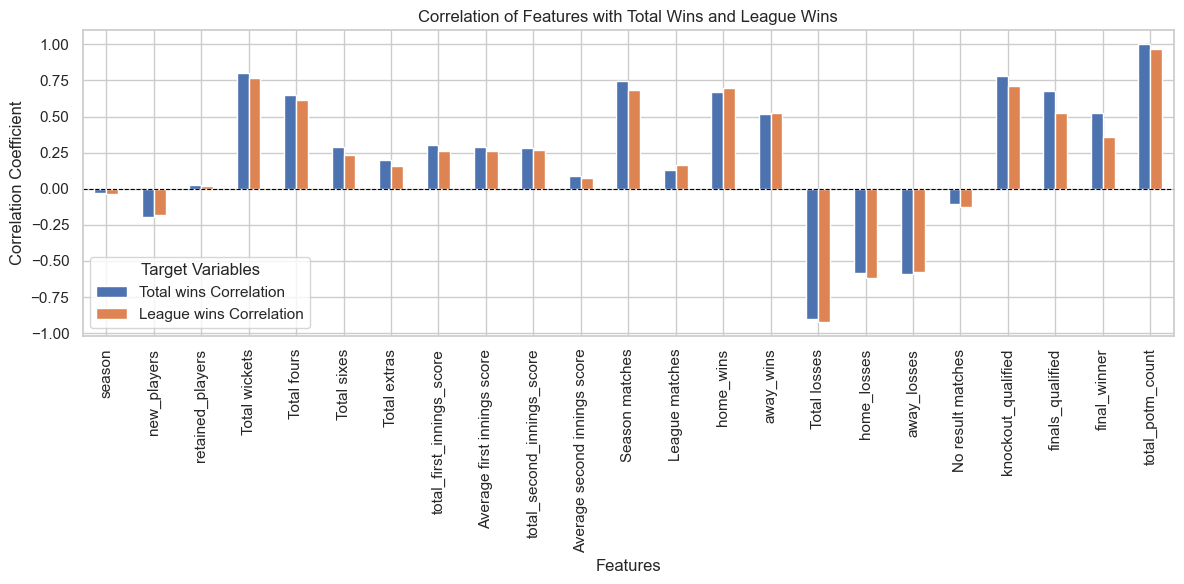

In [45]:
# Select only numeric columns for correlation
numeric_df = finalDataFrame.select_dtypes(include=['float64', 'int64'])

# Calculate correlation for Total wins
total_wins_correlation = numeric_df.corr()['Total wins'].drop(['Total wins', 'League wins'], errors='ignore')

# Calculate correlation for League wins
league_wins_correlation = numeric_df.corr()['League wins'].drop(['Total wins', 'League wins'], errors='ignore')

# Create a DataFrame to hold the results
correlation_comparison = pd.DataFrame({
    'Total wins Correlation': total_wins_correlation,
    'League wins Correlation': league_wins_correlation
})

# Display the correlation comparison
print(correlation_comparison)

# Plotting the correlations
plt.figure(figsize=(12, 6))
correlation_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Correlation of Features with Total Wins and League Wins')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', lw=0.8, ls='--')
plt.xticks(rotation=90)
plt.legend(title='Target Variables')
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

### Linear Regression and its validation

In [46]:
# Feature and Target selection

X = finalDataFrame[['League wins', 'Total losses', 'new_players', 'retained_players', 'Total wickets', 'Total fours', 'Total sixes', 'Total extras', 'total_first_innings_score', 'total_second_innings_score']]
y = finalDataFrame['Total wins']

# Model fitting

linear_model_fit = LinearRegression()
linear_model_fit.fit(X, y)

# Outputs - COo-efficients and intercepts

print('Coefficients:', linear_model_fit.coef_)
print('Intercept:', linear_model_fit.intercept_)

# Prediction using the created linear model

predictions = linear_model_fit.predict(X)

Coefficients: [ 0.73160437 -0.25292131 -0.02187201 -0.02856568  0.01611472 -0.00720441
 -0.01028109  0.00136802  0.0025166   0.00263215]
Intercept: -0.7032159439960148


Feature Selection:
Based on the correlation analysis, we will focus on the most relevant features:

Highly Correlated Features:
Total wickets
Total fours
Season matches
Home wins
Knockout qualified
Total losses (negative correlation)

In [47]:
# Same approach with particular features which cotributes more to target

X = finalDataFrame[['Total wickets', 'Total fours', 'Season matches', 
                    'home_wins', 'knockout_qualified', 'Total losses']]
y = finalDataFrame['Total wins']

# Train - test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Model Predictions

y_pred = linear_regression_model.predict(X_test)

# Evaluation of mterics mean squared error and r2 score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Outputs and showcasing

print('Linear Regression outputs:')
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print('Coefficients:', linear_regression_model.coef_)
print('Intercept:', linear_regression_model.intercept_)

Linear Regression outputs:
Mean Squared Error: 0.2719288532658824
R^2 Score: 0.9561090444872141
Coefficients: [ 0.01104936  0.00164963  0.78728707  0.07608958 -0.56769196 -0.87512599]
Intercept: 0.47990533456679874


In [48]:
# Lasso Regression model
# Similar to Linear regression we create a Lasso and compare results

# Initializing Lasso model with variable alpha which can be altered

lasso_reg_model = Lasso(alpha=0.1)  
lasso_reg_model.fit(X_train, y_train)

y_pred_lasso = lasso_reg_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Lasso outputs

print('Lasso Mean Squared Error:', mse_lasso)
print('Lasso R^2 Score:', r2_lasso)
print('Lasso Coefficients:', lasso_reg_model.coef_)
print('Lasso Intercept:', lasso_reg_model.intercept_)


Lasso Mean Squared Error: 0.3370565182830874
Lasso R^2 Score: 0.9455970469055275
Lasso Coefficients: [ 0.0224615   0.00707444  0.50266831  0.06899126 -0.         -0.74083349]
Lasso Intercept: 1.4572407487868437


In [49]:
# Ridge Regression model

# Initializing Ridge model with variable alpha for regularization strength which can be altered

ridge_reg_model = Ridge(alpha=0.1)  
ridge_reg_model.fit(X_train, y_train)

y_pred_ridge = ridge_reg_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Outputs

print('Ridge Mean Squared Error:', mse_ridge)
print('Ridge R^2 Score:', r2_ridge)
print('Ridge Coefficients:', ridge_reg_model.coef_)
print('Ridge Intercept:', ridge_reg_model.intercept_)


Ridge Mean Squared Error: 0.272020744060952
Ridge R^2 Score: 0.9560942127591721
Ridge Coefficients: [ 0.01112814  0.00169655  0.7841884   0.07645487 -0.55846194 -0.87325675]
Ridge Intercept: 0.4912466670009028


In [50]:
# Overall Comparison using Cross Validation

linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=1.0)

# 1. Linear Regression

linear_cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
linear_cv_mse = -linear_cv_scores.mean()
linear_cv_r2 = cross_val_score(linear_model, X, y, cv=5, scoring='r2').mean()

# 2. Lasso Regression

lasso_cv_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_cv_mse = -lasso_cv_scores.mean()
lasso_cv_r2 = cross_val_score(lasso_model, X, y, cv=5, scoring='r2').mean()

# 3. Ridge Regression

ridge_cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_cv_mse = -ridge_cv_scores.mean()
ridge_cv_r2 = cross_val_score(ridge_model, X, y, cv=5, scoring='r2').mean()

# Output Comparison

print("Linear Regression - Cross-Validated MSE:", linear_cv_mse)
print("Linear Regression - Cross-Validated R^2:", linear_cv_r2)

print("Lasso Regression - Cross-Validated MSE:", lasso_cv_mse)
print("Lasso Regression - Cross-Validated R^2:", lasso_cv_r2)

print("Ridge Regression - Cross-Validated MSE:", ridge_cv_mse)
print("Ridge Regression - Cross-Validated R^2:", ridge_cv_r2)


Linear Regression - Cross-Validated MSE: 0.2731848165972054
Linear Regression - Cross-Validated R^2: 0.9533902453524398
Lasso Regression - Cross-Validated MSE: 0.32408585443290006
Lasso Regression - Cross-Validated R^2: 0.9446255279149177
Ridge Regression - Cross-Validated MSE: 0.27390864779482627
Ridge Regression - Cross-Validated R^2: 0.9532385763320385


In [51]:
# Hyper-parameter tuning

# Hyperparameter grids for Lasso and Ridge

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Lasso Tuning

lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X, y)

# Ridge Tuning

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X, y)

# Evaluation metrics outputs

print("Best Lasso alpha:", lasso_cv.best_params_)
print("Lasso best cross-validated MSE:", -lasso_cv.best_score_)

print("Best Ridge alpha:", ridge_cv.best_params_)
print("Ridge best cross-validated MSE:", -ridge_cv.best_score_)


Best Lasso alpha: {'alpha': 0.001}
Lasso best cross-validated MSE: -0.9533367496300909
Best Ridge alpha: {'alpha': 0.001}
Ridge best cross-validated MSE: -0.9533902273805441


Mean Squared Error: 0.2719288532658824
R^2 Score: 0.9561090444872141


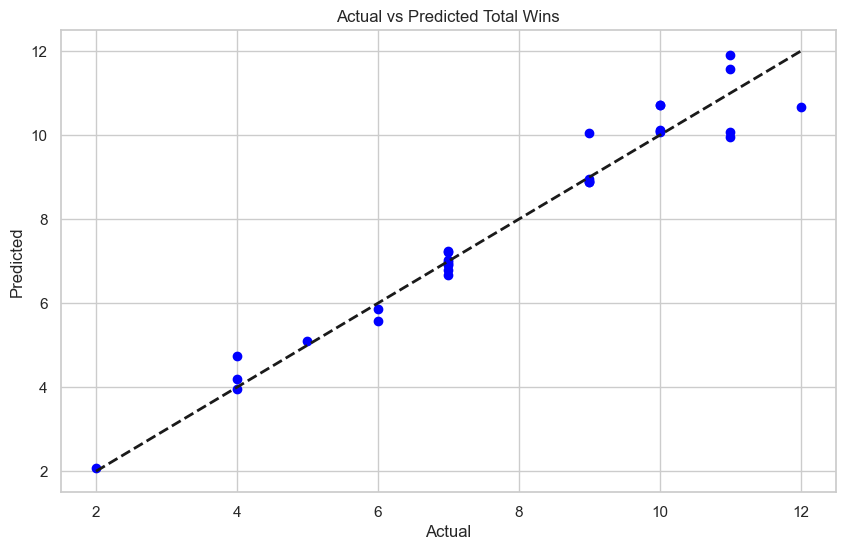

In [52]:
# Linear Regression Plot Visualization

X = finalDataFrame[['Total wickets', 'Total fours', 'Season matches', 
                    'home_wins', 'knockout_qualified', 'Total losses']]
y = finalDataFrame['Total wins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


# Plot creation

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Total Wins')
plt.show()

### Logisitc Regression

Accuracy: 0.93


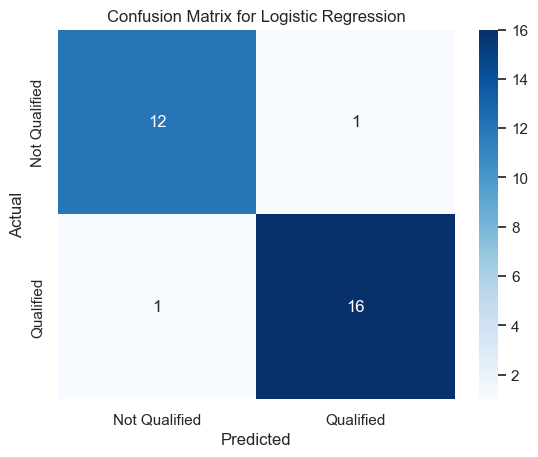

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.94      0.94      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [53]:
# Features and target creation just like linear regression but in this case we predit the knockout qualification

features = ['League wins', 'Total losses', 'Total wickets', 'Total fours', 'Total sixes', 'Total extras', 'total_first_innings_score', 'total_second_innings_score']
X = finalDataFrame[features]
y_knockout = finalDataFrame['knockout_qualified']

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y_knockout, test_size=0.2, random_state=42)

# Standardizing the data to remove outliers and to bring values into appropriate range using standard scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression model

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Prediction

y_pred = log_reg.predict(X_test_scaled)

# Evaluation mterics

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix to understand the prediction

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Qualified', 'Qualified'], yticklabels=['Not Qualified', 'Qualified'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Classification Report for analysis

print('Classification Report:\n', classification_report(y_test, y_pred))


In [54]:
# Hyper - paramter tuning
# Hyperparameter grid

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

# Making use of Grid search algorithm

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Evaluating the obtained results and using the best

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# Prediction by using chosen best model

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluation metrics

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with Best Model: {accuracy_best:.2f}')

confusion_best = confusion_matrix(y_test, y_pred_best)
print('Confusion Matrix for Best Model:\n', confusion_best)

classification_report_best = classification_report(y_test, y_pred_best)
print('Classification Report for Best Model:\n', classification_report_best)


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Best Parameters: {'C': 100, 'solver': 'newton-cg'}
Best Score: 0.9489130434782608
Accuracy with Best Model: 0.90
Confusion Matrix for Best Model:
 [[13  0]
 [ 3 14]]
Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.82      0.90        17

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30



In [55]:
# Logisitic regression using newton-cg and cross validation

log_reg = LogisticRegression(C=100, solver='newton-cg')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X, y_knockout, cv=cv, scoring='accuracy')

# Output metrics

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {np.std(cv_scores):.2f}')


Cross-Validation Accuracy Scores: [0.96666667 0.93103448 0.89655172 0.89655172 0.93103448]
Mean Cross-Validation Accuracy: 0.92
Standard Deviation of Cross-Validation Accuracy: 0.03


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [56]:
# Same approach using Cross-Validation so that it can be Regularized

log_reg_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
log_reg_cv.fit(X, y_knockout)

print(f'Best C (Regularization strength): {log_reg_cv.C_[0]}')
print(f'Best Cross-Validation Score: {log_reg_cv.score(X, y_knockout):.2f}')


Best C (Regularization strength): 2.782559402207126
Best Cross-Validation Score: 0.97


In [57]:
# Finding the best features to support our prediction using RFE

log_reg = LogisticRegression(C=100, solver='newton-cg')

rfe = RFE(log_reg, n_features_to_select=5)
rfe = rfe.fit(X, y_knockout)

# Selected features

selected_features = np.array(features)[rfe.support_]
print(f'Selected Features: {selected_features}')


Selected Features: ['League wins' 'Total losses' 'Total wickets' 'Total fours' 'Total sixes']


In [58]:
y_pred_cv = cross_val_predict(log_reg, X, y_knockout, cv=cv)

# Classification report

print('Classification Report:\n', classification_report(y_knockout, y_pred_cv))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93        81
           1       0.92      0.91      0.91        65

    accuracy                           0.92       146
   macro avg       0.92      0.92      0.92       146
weighted avg       0.92      0.92      0.92       146



C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [59]:
# Simultaneous comparison using Random Forest and Gradient Boosting with Logistic Regression

features = ['League wins', 'Total losses', 'Total wickets', 'Total fours', 'Total sixes']
X = finalDataFrame[features]
y_knockout = finalDataFrame['knockout_qualified']

X_train, X_test, y_train, y_test = train_test_split(X, y_knockout, test_size=0.2, random_state=42)

# Mmodels

models = {
    'Logistic Regression': LogisticRegression(C=2.782559402207126, solver='newton-cg'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Output variable

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

# Comparison Outputs

for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print("Confusion Matrix:\n", result['Confusion Matrix'])
    print("Classification Report:\n", result['Classification Report'])



Logistic Regression Results:
Accuracy: 0.93
Confusion Matrix:
 [[12  1]
 [ 1 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.94      0.94      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Random Forest Results:
Accuracy: 0.90
Confusion Matrix:
 [[12  1]
 [ 2 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.94      0.88      0.91        17

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Gradient Boosting Results:
Accuracy: 0.90
Confusion Matrix:
 [[13  0]
 [ 3 14]]
Classification Report:
               precision    recall

In [60]:
# Using Voting classifier and comparing above result

log_reg = LogisticRegression(C=2.782559402207126, solver='newton-cg')
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('rf', rf),
        ('gb', gb)
    ],

    # 'hard' for majority voting

    voting='soft'  
)

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Evaluation metrics

accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy with Voting Classifier: {accuracy_voting:.2f}')

confusion_voting = confusion_matrix(y_test, y_pred_voting)
print('Confusion Matrix for Voting Classifier:\n', confusion_voting)

classification_report_voting = classification_report(y_test, y_pred_voting)
print('Classification Report for Voting Classifier:\n', classification_report_voting)


Accuracy with Voting Classifier: 0.90
Confusion Matrix for Voting Classifier:
 [[13  0]
 [ 3 14]]
Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.82      0.90        17

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30



In [61]:
# Same approach with stacking classifier
base_learners = [
    ('log_reg', LogisticRegression(C=2.782559402207126, solver='newton-cg')),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]
meta_learner = LogisticRegression()

# Stacking classifier

stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5  
)

stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluation metrics

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy with Stacking Classifier: {accuracy_stacking:.2f}')

confusion_stacking = confusion_matrix(y_test, y_pred_stacking)
print('Confusion Matrix for Stacking Classifier:\n', confusion_stacking)

classification_report_stacking = classification_report(y_test, y_pred_stacking)
print('Classification Report for Stacking Classifier:\n', classification_report_stacking)


Accuracy with Stacking Classifier: 0.87
Confusion Matrix for Stacking Classifier:
 [[12  1]
 [ 3 14]]
Classification Report for Stacking Classifier:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.93      0.82      0.87        17

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



### Decision Tree Classifier

Decision Tree Accuracy: 0.82


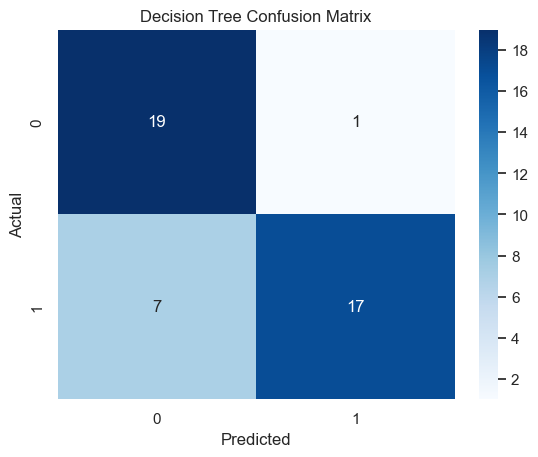

In [62]:
X = finalDataFrame[['League wins', 'Total losses', 'Total wickets', 'Total fours', 'Total sixes', 'Total extras', 'total_first_innings_score', 'total_second_innings_score']]
y = finalDataFrame['knockout_qualified']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Deicision tree model

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Prediction and evaluation

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Confusion matrix for outout analysis

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
# Hyperparameter Tuning with GridSearchCV

# Defining the grid

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearchCV

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# GridSearchCV fitting

grid_search.fit(X_train, y_train)

# Outputs

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.89


In [64]:
# Evaluation metrics

print(classification_report(y_test, y_pred))
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")


              precision    recall  f1-score   support

           0       0.73      0.95      0.83        20
           1       0.94      0.71      0.81        24

    accuracy                           0.82        44
   macro avg       0.84      0.83      0.82        44
weighted avg       0.85      0.82      0.82        44

ROC AUC Score: 0.83


In [65]:
# Feature Importance

importances = dt_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Outputs - Feature importances

print("Feature Importances:\n", feature_importance_df)


Feature Importances:
                       Feature  Importance
1                Total losses    0.636983
5                Total extras    0.146701
7  total_second_innings_score    0.096088
2               Total wickets    0.083976
0                 League wins    0.020392
4                 Total sixes    0.015860
3                 Total fours    0.000000
6   total_first_innings_score    0.000000


In [66]:
# Cross-validation results

cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy Scores: [0.83333333 0.79310345 0.82758621 0.72413793 0.93103448]
Mean Cross-Validation Accuracy: 0.82


### Random Forest and Gradient Boosting Classifiers

In [67]:
# Random Forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Gradient Boosting

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluation metrics

print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.2f}")
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Random Forest Accuracy: 0.91
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.95      0.88      0.91        24

    accuracy                           0.91        44
   macro avg       0.91      0.91      0.91        44
weighted avg       0.91      0.91      0.91        44

Gradient Boosting Accuracy: 0.91
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.95      0.88      0.91        24

    accuracy                           0.91        44
   macro avg       0.91      0.91      0.91        44
weighted avg       0.91      0.91      0.91        44



In [68]:
features = ['team','season',
        'new_players', 'retained_players',
        'Total wickets', 'Total fours', 'Total sixes', 'Total extras',
        'total_first_innings_score', 'Average first innings score',
        'total_second_innings_score', 'Average second innings score',
        'Season matches', 'League matches', 'League wins', 'home_wins',
        'away_wins', 'Total losses', 'home_losses', 'away_losses',
        'total_potm_count',
    ]

X = finalDataFrame[features]
y = finalDataFrame['Total wins']

# Categorical variables (team and season) conversion using one hot encoding

X = pd.get_dummies(X, columns=['team', 'season'], drop_first=True)

# Total wins into categories using bins

bins = [0, 3, 6, 9, 14]  
labels = ['Low', 'Medium', 'High', 'Very High']
y_classified = pd.cut(y, bins=bins, labels=labels)

X_train, X_test, y_train, y_test = train_test_split(X, y_classified, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 96.67%
Confusion Matrix:
[[13  0  0  0]
 [ 0  0  1  0]
 [ 0  0  6  0]
 [ 0  0  0 10]]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        13
         Low       0.00      0.00      0.00         1
      Medium       0.86      1.00      0.92         6
   Very High       1.00      1.00      1.00        10

    accuracy                           0.97        30
   macro avg       0.71      0.75      0.73        30
weighted avg       0.94      0.97      0.95        30



C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

In [69]:
# Same approach with scaling

features = [
    'team', 'season',
    'new_players', 'retained_players',
    'Total wickets', 'Total fours', 'Total sixes', 'Total extras',
    'total_first_innings_score', 'Average first innings score',
    'total_second_innings_score', 'Average second innings score',
    'Season matches', 'League matches', 'League wins',
    'home_wins', 'away_wins',
    'Total losses', 'home_losses', 'away_losses',
    'total_potm_count'
]

X = finalDataFrame[features]
y = finalDataFrame['Total wins']
X = pd.get_dummies(X, columns=['team', 'season'], drop_first=True)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)
bins = [0, 3, 6, 9, 14] 
labels = ['Low', 'Medium', 'High', 'Very High']
y_classified = pd.cut(y, bins=bins, labels=labels)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_classified, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 96.67%
Confusion Matrix:
[[13  0  0  0]
 [ 0  1  0  0]
 [ 0  0  6  0]
 [ 1  0  0  9]]

Classification Report:
              precision    recall  f1-score   support

        High       0.93      1.00      0.96        13
         Low       1.00      1.00      1.00         1
      Medium       1.00      1.00      1.00         6
   Very High       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.98      0.97      0.98        30
weighted avg       0.97      0.97      0.97        30



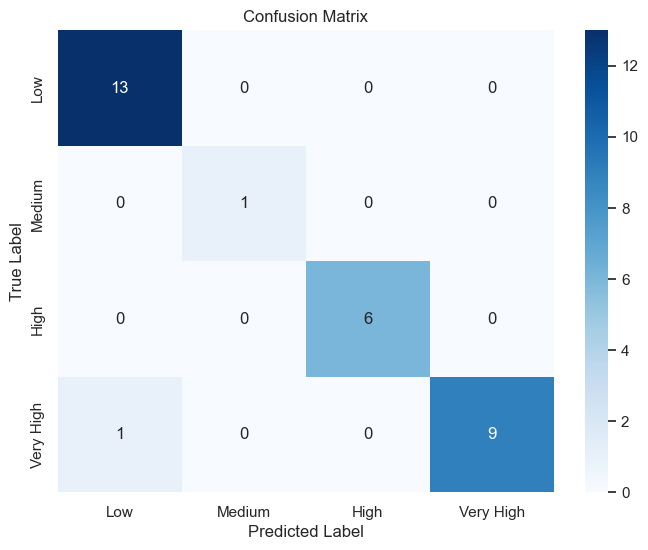

In [70]:
# Output visualization

bins = [0, 4, 8, 12, 16] 
labels = ['Low', 'Medium', 'High', 'Very High']
y_classified = pd.cut(y, bins=bins, labels=labels)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting results

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [71]:
# User interface for knockout qualifiction prediction

# Any team can be selected

team_to_select = 'Chennai Super Kings'
team_data = finalDataFrame[finalDataFrame['team'] == team_to_select]

# Sliders

selected_features = [
    'new_players', 'retained_players', 'Total wins', 'Total wickets', 
    'Total fours', 'Total sixes', 'Season matches', 'home_wins', 
    'away_wins', 'Average first innings score', 'Average second innings score',
    'total_potm_count'
]

features = team_data[selected_features]
target = team_data['knockout_qualified']
model = RandomForestClassifier(random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])
pipeline.fit(features, target)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Function for prediction

def predict_knockout_qualification(new_players, retained_players, total_wins, total_wickets, 
                                    total_fours, total_sixes, season_matches, avg_first_innings_score, 
                                    avg_second_innings_score, home_wins, away_wins, total_potm_count):
    
    # standard ipl formst 8 opponents with 5 retentions per team (can be varied)

    retained_players = min(retained_players, 5) 
    opponents = 8  
    season_matches = min(season_matches, opponents * 2)  

    input_data = np.array([[new_players, retained_players, total_wins, total_wickets, total_fours, 
                            total_sixes, season_matches, avg_first_innings_score, 
                            avg_second_innings_score, home_wins, away_wins, total_potm_count]])
    prediction = pipeline.predict(input_data)
    return "Qualified for Knockouts" if prediction[0] == 1 else "Not Qualified for Knockouts"

# Input Widges

new_players_widget = widgets.IntSlider(value=0, min=0, max=20, description='New Players:')
retained_players_widget = widgets.IntSlider(value=0, min=0, max=5, description='Retained Players:')  # Max 5
total_wins_widget = widgets.IntSlider(value=0, min=0, max=20, description='Total Wins:')
total_wickets_widget = widgets.IntSlider(value=0, min=0, max=200, description='Total Wickets:')
total_fours_widget = widgets.IntSlider(value=0, min=0, max=300, description='Total Fours:')
total_sixes_widget = widgets.IntSlider(value=0, min=0, max=150, description='Total Sixes:')
season_matches_widget = widgets.IntSlider(value=0, min=0, max=16, description='Season Matches:')  # Assuming max matches is 8 * 2 = 16
avg_first_innings_score_widget = widgets.FloatSlider(value=0.0, min=0.0, max=200.0, step=0.1, description='Avg First Innings Score:')
avg_second_innings_score_widget = widgets.FloatSlider(value=0.0, min=0.0, max=200.0, step=0.1, description='Avg Second Innings Score:')
home_wins_widget = widgets.IntSlider(value=0, min=0, max=20, description='Home Wins:')
away_wins_widget = widgets.IntSlider(value=0, min=0, max=20, description='Away Wins:')
total_potm_count_widget = widgets.IntSlider(value=0, min=0, max=30, description='Total POTM Count:')

# Result button
predict_button = widgets.Button(description='Predict Knockout Qualification')
def on_predict_button_clicked(b):
    result = predict_knockout_qualification(new_players_widget.value,
                                             retained_players_widget.value,
                                             total_wins_widget.value,
                                             total_wickets_widget.value,
                                             total_fours_widget.value,
                                             total_sixes_widget.value,
                                             season_matches_widget.value,
                                             avg_first_innings_score_widget.value,
                                             avg_second_innings_score_widget.value,
                                             home_wins_widget.value,
                                             away_wins_widget.value,
                                             total_potm_count_widget.value)
    print(result)

predict_button.on_click(on_predict_button_clicked)

# Ouptput interface creation

display(new_players_widget)
display(retained_players_widget)
display(total_wins_widget)
display(total_wickets_widget)
display(total_fours_widget)
display(total_sixes_widget)
display(season_matches_widget)
display(avg_first_innings_score_widget)
display(avg_second_innings_score_widget)
display(home_wins_widget)
display(away_wins_widget)
display(total_potm_count_widget)
display(predict_button)


IntSlider(value=0, description='New Players:', max=20)

IntSlider(value=0, description='Retained Players:', max=5)

IntSlider(value=0, description='Total Wins:', max=20)

IntSlider(value=0, description='Total Wickets:', max=200)

IntSlider(value=0, description='Total Fours:', max=300)

IntSlider(value=0, description='Total Sixes:', max=150)

IntSlider(value=0, description='Season Matches:', max=16)

FloatSlider(value=0.0, description='Avg First Innings Score:', max=200.0)

FloatSlider(value=0.0, description='Avg Second Innings Score:', max=200.0)

IntSlider(value=0, description='Home Wins:', max=20)

IntSlider(value=0, description='Away Wins:', max=20)

IntSlider(value=0, description='Total POTM Count:', max=30)

Button(description='Predict Knockout Qualification', style=ButtonStyle())

Qualified for Knockouts


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [72]:
merged_df.to_csv('merged_df.csv', index=False)